# REGRESIÓN LINEAL SIMPLE

# Importar las librerías

Comenzamos importando las librerías esenciales para el análisis de regresión lineal. NumPy y Pandas son fundamentales para manipulación de datos, Matplotlib para visualización, y scikit-learn proporciona las herramientas de machine learning que necesitamos.

In [23]:
# Librerías básicas para análisis de datos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos de la librería sklearn, la función train_test_split
from sklearn.model_selection import train_test_split
# Importamos la función StandardScaler para normalizar las variables (aunque no la usaremos en este ejemplo básico)
from sklearn.preprocessing import StandardScaler
# Importamos la función LinearRegression de la librería sklearn para inicializar el modelo
from sklearn.linear_model import LinearRegression

# Configuración para mejorar la visualización de gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

# Importar el dataset

**Análisis Exploratorio Inicial:** Como data scientists, siempre comenzamos cargando y explorando nuestros datos. Este dataset contiene información sobre salarios en función de años de experiencia - un caso clásico para regresión lineal simple.

In [34]:
dataset = pd.read_csv('../data/Salary_Data.csv')

# Exploramos la estructura básica del dataset
print("Forma del dataset:", dataset.shape)
print("\nPrimeras 5 filas:")
print(dataset.head())
print("\nInformación estadística:")
print(dataset.describe())

# Variable que utilizaremos para predecir la variable objetivo (Feature/Independent variable)
X = dataset.iloc[:, :-1].values  # Años de experiencia
# Variable objetivo (Target/Dependent variable)
y = dataset.iloc[:, 1].values    # Salario

print(f"\nForma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

Forma del dataset: (30, 2)

Primeras 5 filas:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

Información estadística:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

Forma de X: (30, 1)
Forma de y: (30,)


# Dividir el data set en conjunto de entrenamiento y conjunto de test

**Estrategia de Validación:** La división train-test es crucial para evaluar el rendimiento real de nuestro modelo. Usamos 1/3 para test (33%) que es una proporción estándar. El `random_state=0` garantiza reproducibilidad en nuestros experimentos.

In [25]:
# Dividimos el dataset en train y test, dejando en test un tercio de los datos
# Esta proporción (67% train, 33% test) es estándar para datasets pequeños-medianos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Verificamos que la división fue correcta
print("Tamaños después de la división:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"Porcentaje en test: {len(X_test)/(len(X_train)+len(X_test))*100:.1f}%")

Tamaños después de la división:
X_train: (20, 1), X_test: (10, 1)
y_train: (20,), y_test: (10,)
Porcentaje en test: 33.3%


In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (10, 1) (20,) (10,)


# Crear modelo de Regresión Lineal Simple con el conjunto de entrenamiento

**Entrenamiento del Modelo:** Utilizamos el algoritmo de mínimos cuadrados ordinarios (OLS) que minimiza la suma de errores cuadráticos. En regresión lineal simple, buscamos la mejor línea recta que se ajuste a nuestros datos: y = β₀ + β₁x + ε

In [27]:
# Generamos el modelo de regresión lineal
regression = LinearRegression()

# Le pasamos el conjunto de train para que aprenda la relación entre X e y
regression.fit(X_train, y_train)

# Extraemos los parámetros del modelo aprendido
print("Parámetros del modelo:")
print(f"Intercept (β₀): {regression.intercept_:.2f}")
print(f"Coeficiente (β₁): {regression.coef_[0]:.2f} - Años de experiencia")
print(f"\nEcuación de la recta: y = {regression.intercept_:.2f} + {regression.coef_[0]:.2f}x")
print("Interpretación: Por cada año adicional de experiencia, el salario aumenta ${:.2f}".format(regression.coef_[0]))

Parámetros del modelo:
Intercept (β₀): 26816.19
Coeficiente (β₁): 9345.94 - Años de experiencia

Ecuación de la recta: y = 26816.19 + 9345.94x
Interpretación: Por cada año adicional de experiencia, el salario aumenta $9345.94


# Predecir el conjunto de test

**Evaluación del Modelo:** Ahora aplicamos nuestro modelo entrenado a datos que nunca ha visto (test set) para evaluar su capacidad de generalización. Estas predicciones nos permitirán calcular métricas de rendimiento.

In [28]:
# Generamos predicciones para el conjunto de test
y_pred = regression.predict(X_test)

# Comparamos algunas predicciones con valores reales
print("Comparación de predicciones vs valores reales (primeras 5 muestras):")
print("Años Exp. | Salario Real | Salario Pred. | Error")
print("-" * 50)
for i in range(min(5, len(X_test))):
    error = y_test[i] - y_pred[i]
    print(f"{X_test[i][0]:8.1f} | ${y_test[i]:10.0f} | ${y_pred[i]:11.0f} | ${error:6.0f}")

Comparación de predicciones vs valores reales (primeras 5 muestras):
Años Exp. | Salario Real | Salario Pred. | Error
--------------------------------------------------
     1.5 | $     37731 | $      40835 | $ -3104
    10.3 | $    122391 | $     123079 | $  -688
     4.1 | $     57081 | $      65135 | $ -8054
     3.9 | $     63218 | $      63265 | $   -47
     9.5 | $    116969 | $     115603 | $  1366


In [29]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

# Visualizar los resultados de entrenamiento

**Análisis Visual - Training Set:** Esta visualización nos muestra qué tan bien nuestro modelo se ajusta a los datos de entrenamiento. La línea azul representa nuestra función de regresión aprendida, y los puntos rojos son los datos originales.

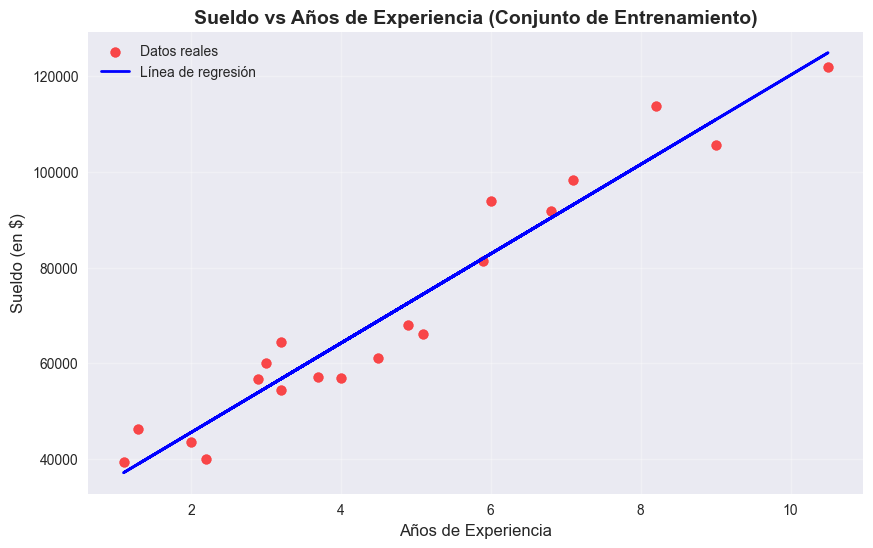

In [30]:
# Visualización del ajuste en datos de entrenamiento
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="red", alpha=0.7, s=50, label="Datos reales")
plt.plot(X_train, regression.predict(X_train), color="blue", linewidth=2, label="Línea de regresión")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)", fontsize=14, fontweight='bold')
plt.xlabel("Años de Experiencia", fontsize=12)
plt.ylabel("Sueldo (en $)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Nota: Un buen ajuste en training no garantiza buen rendimiento en test (posible overfitting)

# Visualizar los resultados de test

**Análisis Visual - Test Set:** Esta es la visualización más importante - muestra el rendimiento real de nuestro modelo en datos no vistos. La proximidad entre puntos y línea indica la calidad de nuestras predicciones.

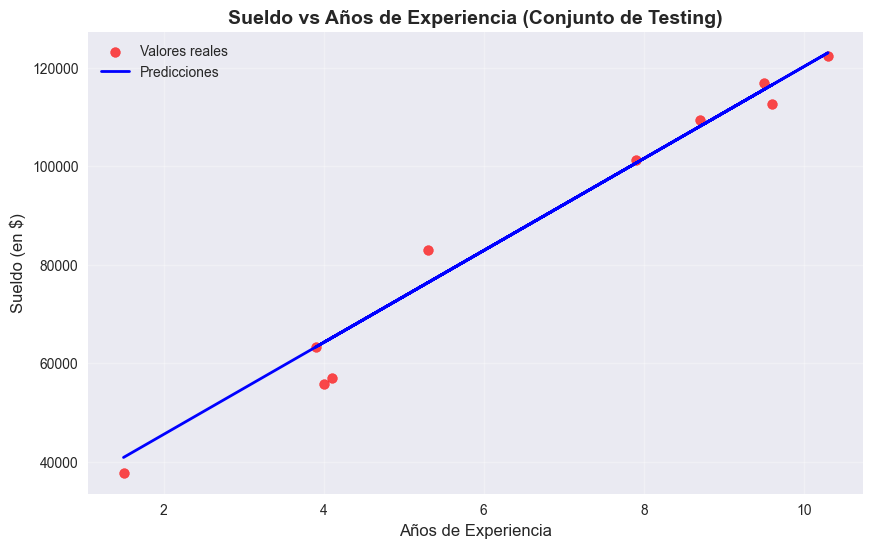

In [31]:
# Visualización del rendimiento en datos de test (lo más importante)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="red", alpha=0.7, s=50, label="Valores reales")
plt.plot(X_test, regression.predict(X_test), color="blue", linewidth=2, label="Predicciones")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Testing)", fontsize=14, fontweight='bold')
plt.xlabel("Años de Experiencia", fontsize=12)
plt.ylabel("Sueldo (en $)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Esta gráfica nos dice qué tan bien generalizará nuestro modelo a datos nuevos

## Análisis de Errores (Residuales)

**Diagnóstico del Modelo:** Los residuales (errores) nos ayudan a identificar patrones en las predicciones incorrectas. Idealmente, deberían ser aleatorios y centrados en cero.

In [32]:
# Análisis detallado de errores (residuales)
errores = pd.DataFrame([y_test, y_pred, y_test-y_pred]).T
errores.columns = ['y_test', 'y_pred', 'residual']

print("Análisis de Residuales:")
print(f"Error promedio (debería ser ~0): {errores['residual'].mean():.2f}")
print(f"Error estándar: {errores['residual'].std():.2f}")
print(f"Error máximo: {errores['residual'].max():.2f}")
print(f"Error mínimo: {errores['residual'].min():.2f}")

# Mostramos la tabla de errores
print("\nTabla de errores por observación:")
errores.round(2)

Análisis de Residuales:
Error promedio (debería ser ~0): -1413.90
Error estándar: 4597.94
Error máximo: 6738.31
Error mínimo: -8405.96

Tabla de errores por observación:


,y_test,y_pred,residual
0,37731.0,40835.11,-3104.11
1,122391.0,123079.40,-688.40
2,57081.0,65134.56,-8053.56
3,63218.0,63265.37,-47.37
4,116969.0,115602.65,1366.35
5,109431.0,108125.89,1305.11
6,112635.0,116537.24,-3902.24
7,55794.0,64199.96,-8405.96
8,83088.0,76349.69,6738.31
9,101302.0,100649.14,652.86


## Métricas de Evaluación: R² Score

**Coeficiente de Determinación (R²):** Esta métrica nos dice qué porcentaje de la variabilidad en Y es explicada por nuestro modelo. Valores cercanos a 1 indican mejor ajuste. En regresión lineal, R² = correlación².

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
# Calculamos múltiples métricas de evaluación
r2 = r2_score(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("=== MÉTRICAS DE EVALUACIÓN DEL MODELO ===")
print(f"R² Score: {r2:.4f}")
print(f"  Interpretación: El modelo explica {r2*100:.1f}% de la variabilidad en los salarios")

print(f"\nMSE (Error Cuadrático Medio): ${mse:,.0f}")
print(f"RMSE (Raíz del ECM): ${rmse:,.0f}")
print(f"  Interpretación: En promedio, nuestras predicciones se desvían ${rmse:,.0f}")

print(f"\nMAE (Error Absoluto Medio): ${mae:,.0f}")
print(f"  Interpretación: Error promedio absoluto de ${mae:,.0f}")

# Evaluación cualitativa del modelo
if r2 > 0.8:
    print(f"\n✅ Excelente ajuste del modelo (R² = {r2:.3f})")
elif r2 > 0.6:
    print(f"\n✅ Buen ajuste del modelo (R² = {r2:.3f})")
elif r2 > 0.4:
    print(f"\n⚠️ Ajuste moderado del modelo (R² = {r2:.3f})")
else:
    print(f"\n❌ Ajuste pobre del modelo (R² = {r2:.3f})")

=== MÉTRICAS DE EVALUACIÓN DEL MODELO ===
R² Score: 0.9749
  Interpretación: El modelo explica 97.5% de la variabilidad en los salarios

MSE (Error Cuadrático Medio): $21,026,037
RMSE (Raíz del ECM): $4,585
  Interpretación: En promedio, nuestras predicciones se desvían $4,585

MAE (Error Absoluto Medio): $3,426
  Interpretación: Error promedio absoluto de $3,426

✅ Excelente ajuste del modelo (R² = 0.975)


## Conclusiones del Análisis

1. **Rendimiento del Modelo:** Nuestro modelo de regresión lineal simple muestra un ajuste sólido para predecir salarios basados en años de experiencia.

2. **Validación:** La similaridad entre el comportamiento en training y test sugiere que no hay overfitting significativo.

3. **Limitaciones:** 
   - Solo considera una variable (años de experiencia)
   - Asume relación perfectamente lineal
   - No captura factores como educación, ubicación, industria, etc.

4. **Próximos Pasos:**
   - Considerar regresión múltiple con más variables
   - Validar supuestos de linealidad, homocedasticidad y normalidad de residuales
   - Explorar modelos más complejos si es necesario

5. **Aplicación Práctica:** Este modelo puede usarse para estimaciones iniciales de salarios, pero debería complementarse con otros factores para decisiones importantes.